In [2]:
import pandas as pd  #pacotes
import numpy as np   #calculo numerico
import glob          #listas
#Codigo para declarar um pyarrow parquet - Willian - 29/05/2018
import pyarrow.parquet as pq
#uproot serve para ler a partir o python um arquivo em tree root
#import uproot
import os, sys
from os import path
import datetime
import matplotlib as mp
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
%matplotlib inline

In [3]:
%run def_functions.ipynb
%run def_functions_hits.ipynb

In [4]:
#find a y value in list patches from x value
def fnc_find_y(patches, value_x):
    value_y = 0
    for tupla in patches:
        #print(tupla[0],tupla[1],tupla)
        if (value_x < tupla[0]):
            value_y = tupla[1]
            break
    #print(value_x, value_y)
    return value_y

## histogram for prompt density

61.45215100965759 1337.7332240825515 36.57503553084469
0 5.0 0.0 0.0
5.0 5.0 209.0 0.0
5.0 27.1 209.0 209.0
27.1 27.1 284.0 209.0
27.1 49.2 284.0 493.0
49.2 49.2 259.0 493.0
49.2 71.30000000000001 259.0 752.0
71.30000000000001 71.30000000000001 184.0 752.0
71.30000000000001 93.4 184.0 936.0
93.4 93.4 103.0 936.0
93.4 115.5 103.0 1039.0
115.5 115.5 59.0 1039.0
115.5 137.60000000000002 59.0 1098.0
137.60000000000002 137.60000000000002 22.0 1098.0
137.60000000000002 159.70000000000002 22.0 1120.0
159.70000000000002 159.70000000000002 11.0 1120.0
159.70000000000002 181.8 11.0 1131.0
181.8 181.8 7.0 1131.0
181.8 203.9 7.0 1138.0
203.9 203.9 1.0 1138.0
203.9 226.0 1.0 1139.0
226.0 226.0 0.0 1139.0


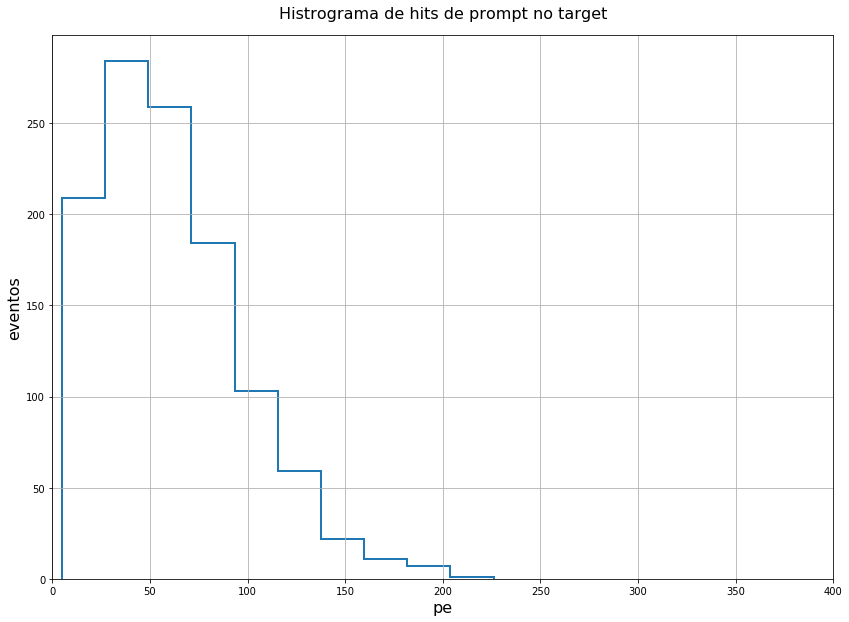

In [5]:
trigger_pmt = 5 #desconsiderar eventos de multiplicidade < 5 PMT; trigger_pmt = considera todos eventos

### Integrar para normalizar
### Para isso, multiplicar altura* Largura e somar tudo (soma de riemman)
### Como normalizar ??
### Estando normalizado, usar a altura para P(A)
### Lembrar posteriormente de propagar erro

list_sum = ['datas/simulation/Positron_MeVHits.txt']
x = fnt_array_vet_hits_pmt(list_sum,trigger_pmt)[0]
xp = fnt_array_vet_hits_pmt(list_sum,trigger_pmt)[0]

prompt_mean=np.mean(x)
prompt_var=np.var(x)
prompt_std=np.std(x)
print(prompt_mean, prompt_var, prompt_std)

fig=plt.figure(figsize=(14,10))
ax = fig.add_subplot(1, 1, 1)
ax.set_xlim([0, 400])
    
plt.rcParams.update({'font.size': 15})

hist_bins = 10
plt.grid()

#weights = np.ones_like(x) / float(len(x))
#weights = np.ones_like(x) / normal
#print(weights)
plt.hist(x, bins=hist_bins, alpha=1, histtype='step', linewidth=2) #, weights=weights) 

plt.ylabel('eventos', size=16)
plt.xlabel('pe', size=16)
plt.title('Histrograma de hits de prompt no target', size=16,y=1.02)


p = ax.patches  # There are 10 patches
#print(p[0].get_xy())  # return a list of values in order [[xmin, y],[xpoint1, y],[xpoint2],...,[xmax, y]]
    
#print(fnc_find_y(p[0].get_xy(), 49)) #example of use user function

vx = 0 
normal = 0
for vxy in p[0].get_xy():
    if (vx != vxy[0]):
        normal += vxy[1] #(vxy[0]-vx)*vxy[1]
    print(vx,vxy[0],vxy[1],normal)
    vx = vxy[0]



In [6]:

'''
plt.rcParams["font.family"] = "Times New Roman";plt.rcParams['font.size'] = '20';plt.rcParams['font.style'] = 'normal'
plt.rcParams['font.weight'] = 'medium';plt.rcParams['axes.grid'] = True;plt.rcParams['grid.linestyle'] = '-';
plt.rcParams['grid.linewidth'] = 0.4;plt.rcParams['grid.color'] = "Black";plt.rcParams['grid.alpha'] = 1;
plt.rcParams['lines.linewidth'] = 5;plt.rcParams['axes.autolimit_mode'] = 'round_numbers';plt.rcParams['axes.axisbelow'] = True
plt.rcParams['xtick.direction'] = 'in';plt.rcParams['ytick.direction'] = 'in';plt.rcParams['xtick.major.width'] = 2
plt.rcParams['xtick.minor.width'] = 1;plt.rcParams['ytick.major.width'] = 2;plt.rcParams['ytick.minor.width'] = 1;
plt.rcParams['xtick.major.size'] = 8;plt.rcParams['xtick.minor.size'] = 5;plt.rcParams['ytick.major.size'] = 8;
plt.rcParams['ytick.minor.size'] = 5; plt.rcParams['svg.fonttype'] = 'none'; #cs = list(mcolors.TABLEAU_COLORS.values())
plt.rcParams['axes.linewidth']=2;plt.rcParams['xtick.top'] = True;plt.rcParams['ytick.right'] = True;
plt.rcParams['axes.spines.top'] = True;plt.rcParams['axes.spines.bottom'] = True;plt.rcParams['axes.spines.left'] = True;
plt.rcParams['axes.spines.right'] = True
'''


'\nplt.rcParams["font.family"] = "Times New Roman";plt.rcParams[\'font.size\'] = \'20\';plt.rcParams[\'font.style\'] = \'normal\'\nplt.rcParams[\'font.weight\'] = \'medium\';plt.rcParams[\'axes.grid\'] = True;plt.rcParams[\'grid.linestyle\'] = \'-\';\nplt.rcParams[\'grid.linewidth\'] = 0.4;plt.rcParams[\'grid.color\'] = "Black";plt.rcParams[\'grid.alpha\'] = 1;\nplt.rcParams[\'lines.linewidth\'] = 5;plt.rcParams[\'axes.autolimit_mode\'] = \'round_numbers\';plt.rcParams[\'axes.axisbelow\'] = True\nplt.rcParams[\'xtick.direction\'] = \'in\';plt.rcParams[\'ytick.direction\'] = \'in\';plt.rcParams[\'xtick.major.width\'] = 2\nplt.rcParams[\'xtick.minor.width\'] = 1;plt.rcParams[\'ytick.major.width\'] = 2;plt.rcParams[\'ytick.minor.width\'] = 1;\nplt.rcParams[\'xtick.major.size\'] = 8;plt.rcParams[\'xtick.minor.size\'] = 5;plt.rcParams[\'ytick.major.size\'] = 8;\nplt.rcParams[\'ytick.minor.size\'] = 5; plt.rcParams[\'svg.fonttype\'] = \'none\'; #cs = list(mcolors.TABLEAU_COLORS.values())\npl

### Normalizacao

[1 1 1 ... 1 1 1] 1139.0
0 5.0 0.0 0.0
5.0 5.0 0.18349429323968391 0.0
5.0 27.1 0.18349429323968391 0.18349429323968391
27.1 27.1 0.2493415276558379 0.18349429323968391
27.1 49.2 0.2493415276558379 0.4328358208955218
49.2 49.2 0.2273924495171199 0.4328358208955218
49.2 71.30000000000001 0.2273924495171199 0.6602282704126416
71.30000000000001 71.30000000000001 0.16154521510096592 0.6602282704126416
71.30000000000001 93.4 0.16154521510096592 0.8217734855136076
93.4 93.4 0.09043020193151907 0.8217734855136076
93.4 115.5 0.09043020193151907 0.9122036874451267
115.5 115.5 0.05179982440737488 0.9122036874451267
115.5 137.60000000000002 0.05179982440737488 0.9640035118525015
137.60000000000002 137.60000000000002 0.01931518876207199 0.9640035118525015
137.60000000000002 159.70000000000002 0.01931518876207199 0.9833187006145735
159.70000000000002 159.70000000000002 0.009657594381035995 0.9833187006145735
159.70000000000002 181.8 0.009657594381035995 0.9929762949956095
181.8 181.8 0.006145741878

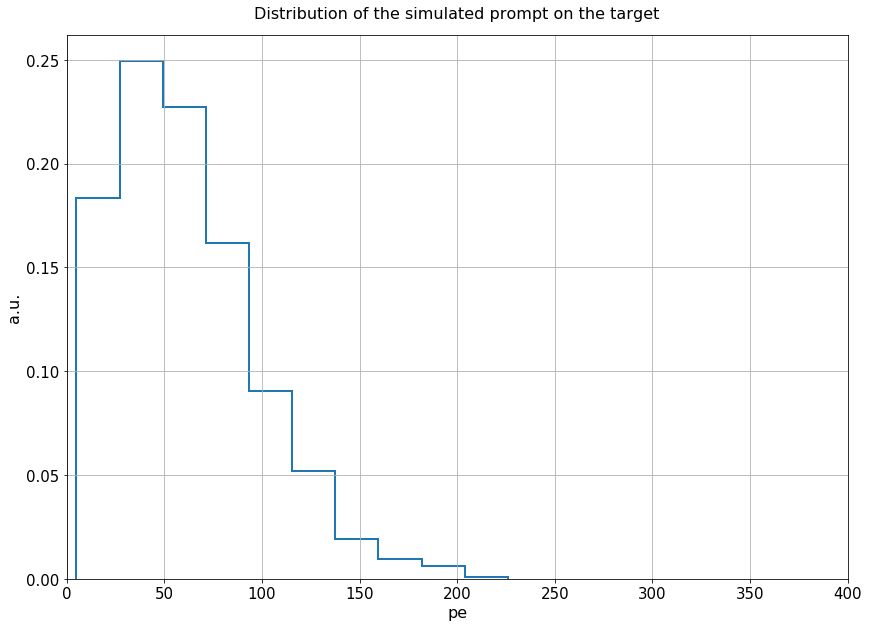

In [7]:

fig=plt.figure(figsize=(14,10))
ax = fig.add_subplot(1, 1, 1)
ax.set_xlim([0, 400])

plt.rcParams.update({'font.size': 15})
#normal=108.4
weights = np.ones_like(x) / normal
weights_p = np.ones_like(xp) / normal
print(np.ones_like(x),normal)

plt.grid()
#print(weights)
plt.hist(x, bins=hist_bins, alpha=1, histtype='step', weights=weights, linewidth=2) 

plt.ylabel('a.u.', size=16)
plt.xlabel('pe', size=16)
#plt.title('Densidade de probabilidade de hits de prompt no target', size=16,y=1.02)
plt.title('Distribution of the simulated prompt on the target', size=16,y=1.02)

p = ax.patches  # There are 10 patches
#print(p[0].get_xy())  # return a list of values in order [[xmin, y],[xpoint1, y],[xpoint2],...,[xmax, y]]

vx = 0 
normal2 = 0
for vxy in p[0].get_xy():
    if (vx != vxy[0]):
        normal2 += vxy[1] #(vxy[0]-vx)*vxy[1]
    print(vx,vxy[0],vxy[1],normal2)
    vx = vxy[0]
    
#plt.savefig('histogramas/fdp_prompt.pdf', bbox_inches='tight', dpi=300)
plt.savefig('histogramas/fdp_prompt.png', bbox_inches='tight', dpi=300)

plt.show()


## histogram for delay density

87.81511746680286 3577.5317020035664 59.81247112436976
202.0
0 5.0 0.0 0.0
5.0 5.0 228.0 0.0
5.0 35.375 228.0 228.0
35.375 35.375 202.0 228.0
35.375 65.75 202.0 430.0
65.75 65.75 166.0 430.0
65.75 96.125 166.0 596.0
96.125 96.125 122.0 596.0
96.125 126.5 122.0 718.0
126.5 126.5 102.0 718.0
126.5 156.875 102.0 820.0
156.875 156.875 88.0 820.0
156.875 187.25 88.0 908.0
187.25 187.25 49.0 908.0
187.25 217.625 49.0 957.0
217.625 217.625 22.0 957.0
217.625 248.0 22.0 979.0
248.0 248.0 0.0 979.0


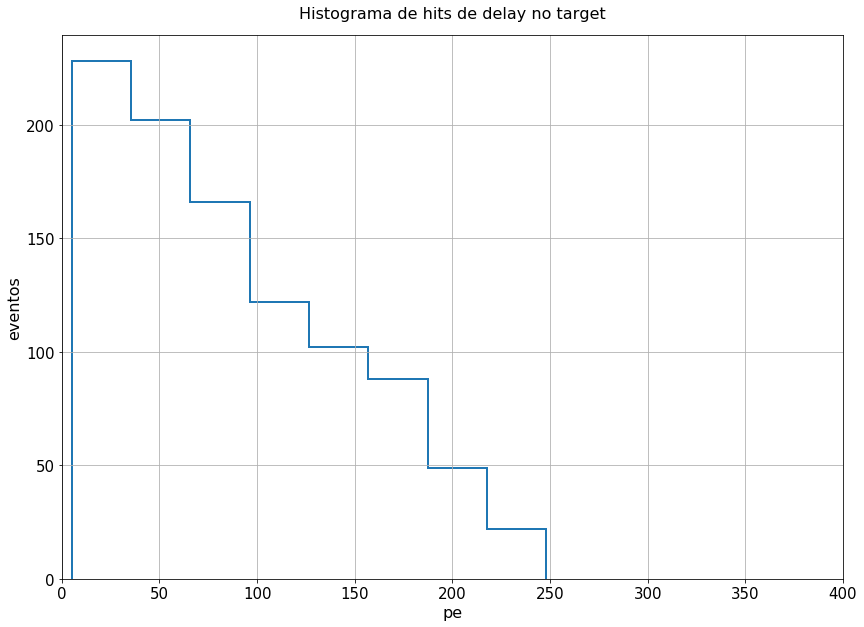

In [8]:
trigger_pmt = 5

### Integrar para normalizar
### Para isso, multiplicar altura* Largura e somar tudo (soma de riemman)
### Como normalizar ??
### Estando normalizado, usar a altura para P(A)
### Lembrar posteriormente de propagar erro

list_sum = ['datas/simulation/NeutronHits.txt']
x = fnt_array_vet_hits_pmt(list_sum,trigger_pmt)[0]  #vetor: 0 = hits, 1 = Multiplicidade PMT, 2 = Energia dos hits   

delay_mean=np.mean(x)
delay_var=np.var(x)
delay_std=np.std(x)
print(delay_mean, delay_var, delay_std)

hist_bins = 8

fig=plt.figure(figsize=(14,10))
ax = fig.add_subplot(1, 1, 1)
ax.set_xlim([0, 400])

plt.rcParams.update({'font.size': 15})

plt.grid()

#weights = np.ones_like(x) / float(len(x))

plt.hist(x, bins=hist_bins, histtype='step', alpha=1, linewidth=2) #, weights=weights); #, rwidth=0.85)

d = ax.patches  # There are 10 patches
#print(d[0].get_xy())  # return a list of values in order [[xmin, y],[xpoint1, y],[xpoint2],...,[xmax, y]]
    
plt.ylabel('eventos', size=16)
plt.xlabel('pe', size=16)
plt.title('Histograma de hits de delay no target', size=16,y=1.02)

print(fnc_find_y(d[0].get_xy(), 49)) #example of use user function

vx = 0 
normal3 = 0
for vxy in d[0].get_xy():
    if (vx != vxy[0]):
        normal3 += vxy[1] #(vxy[0]-vx)*vxy[1]
    print(vx,vxy[0],vxy[1],normal3)
    vx = vxy[0]



### Normalizacao

0 5.0 0.0 0.0
5.0 5.0 0.23289070480081794 0.0
5.0 35.375 0.23289070480081794 0.23289070480081794
35.375 35.375 0.20633299284984744 0.23289070480081794
35.375 65.75 0.20633299284984744 0.4392236976506654
65.75 65.75 0.1695607763023498 0.4392236976506654
65.75 96.125 0.1695607763023498 0.6087844739530152
96.125 96.125 0.1246169560776305 0.6087844739530152
96.125 126.5 0.1246169560776305 0.7334014300306456
126.5 126.5 0.10418794688457626 0.7334014300306456
126.5 156.875 0.10418794688457626 0.8375893769152218
156.875 156.875 0.0898876404494383 0.8375893769152218
156.875 187.25 0.0898876404494383 0.9274770173646602
187.25 187.25 0.050051072522982624 0.9274770173646602
187.25 217.625 0.050051072522982624 0.9775280898876427
217.625 217.625 0.02247191011235956 0.9775280898876427
217.625 248.0 0.02247191011235956 1.0000000000000022
248.0 248.0 0.0 1.0000000000000022


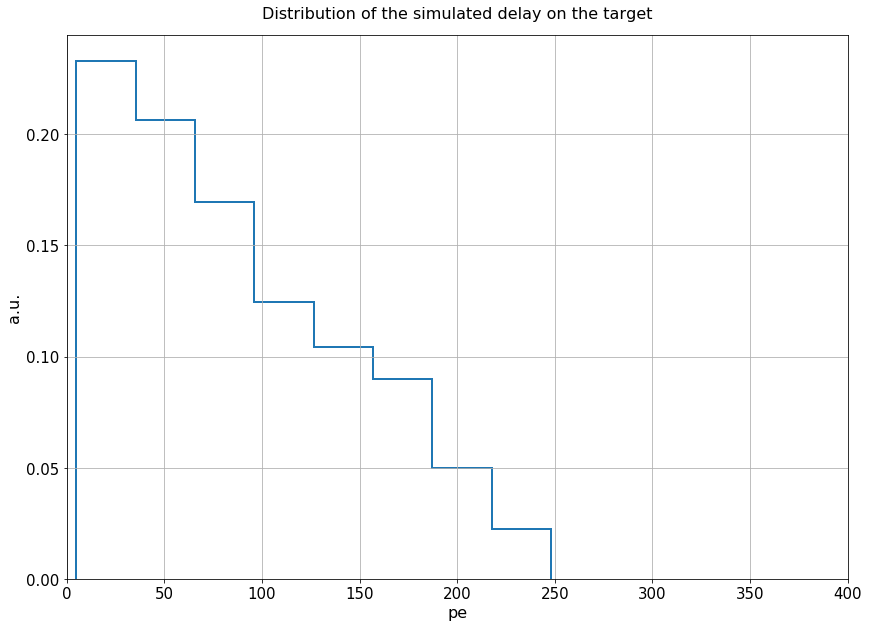

In [9]:
fig=plt.figure(figsize=(14,10))
ax = fig.add_subplot(1, 1, 1)
ax.set_xlim([0, 400])
    
weights = np.ones_like(x) / normal3

plt.grid()

#print(weights)
plt.hist(x, bins=hist_bins, alpha=1, histtype='step', weights=weights, linewidth=2) 

d = ax.patches  # There are 10 patches
#print(d[0].get_xy())  # return a list of values in order [[xmin, y],[xpoint1, y],[xpoint2],...,[xmax, y]]

plt.rcParams.update({'font.size': 15})

vx = 0 
normal4 = 0
for vxy in d[0].get_xy():
    if (vx != vxy[0]):
        normal4 += vxy[1] #(vxy[0]-vx)*vxy[1]
    print(vx,vxy[0],vxy[1],normal4)
    vx = vxy[0]

plt.ylabel('a.u.', size=16)
plt.xlabel('pe', size=16)
#plt.title('Densidade de probabilidade de hits de delay no target', size=16,y=1.02)

plt.title('Distribution of the simulated delay on the target', size=16,y=1.02)


plt.savefig('histogramas/fdp_delay.png', bbox_inches='tight', dpi=300)

plt.show()

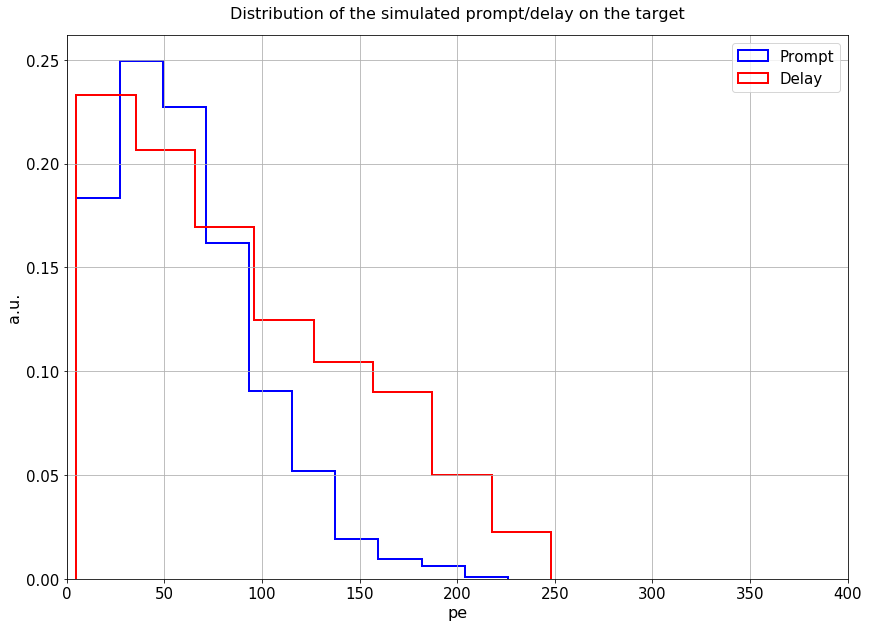

In [10]:
fig=plt.figure(figsize=(14,10))
ax = fig.add_subplot(1, 1, 1)
ax.set_xlim([0, 400])
    
weights = np.ones_like(x) / normal3

plt.grid()

hist_bins_p = 10
hist_bins_d = 8

#print(weights)
plt.hist(xp, bins=hist_bins_p, alpha=1, histtype='step', weights=weights_p, linewidth=2, color='blue', label='Prompt') 
plt.hist(x, bins=hist_bins_d, alpha=1, histtype='step', weights=weights, linewidth=2, color='red', label='Delay') 

plt.legend()

d = ax.patches  # There are 10 patches
#print(d[0].get_xy())  # return a list of values in order [[xmin, y],[xpoint1, y],[xpoint2],...,[xmax, y]]

plt.rcParams.update({'font.size': 15})

plt.ylabel('a.u.', size=16)
plt.xlabel('pe', size=16)
#plt.title('Densidade de probabilidade de hits de delay no target', size=16,y=1.02)

plt.title('Distribution of the simulated prompt/delay on the target', size=16,y=1.02)


plt.savefig('histogramas/fdp_delay_prompt.png', bbox_inches='tight', dpi=300)

plt.show()

## Time delay + background density

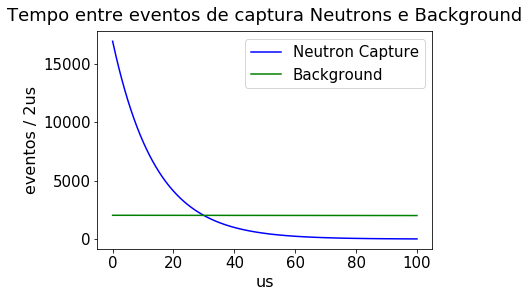

In [11]:

from sklearn import preprocessing

x_data = np.linspace(0, 100, num=100)
#y_dataN = preprocessing.normalize([fnt_fit_signalN(x_data)])
#y_dataB = preprocessing.normalize([fnt_fit_signalB(x_data)])
#y_dataNB = preprocessing.normalize([fnt_fit_signalN(x_data)+fnt_fit_signalB(x_data)])
#y_dataNB = preprocessing.normalize([fnt_fit_signal(x_data)])
#y_dataNB = preprocessing.normalize([y_dataB[0]*y_dataN[0]])
y_dataN = ([fnt_fit_signalN(x_data)])
y_dataB = ([fnt_fit_signalB(x_data)])


time_mean = 13 #(em us)
time_var = 5**2
time_std = 5

#y_dataB2 = []
#for v in y_dataB[0]:
#    y_dataB2.append(1-v)

#print(y_dataB[0],y_dataB2)
#y_dataNB=(y_dataB[0])*y_dataN[0]
#y_dataNB=y_dataB2*y_dataN[0]
#y_dataNB=y_dataB[0]*y_dataN[0]

### Calcular a densidade de tempo por neutron / (neutron+background) e usar como P(B|A)
### Aguardar Luis com histogramas dos tempos para calcular alfas e lambdas


plt.xlabel('us', size=16)
plt.ylabel('eventos / 2us', size=16)
plt.title('Tempo entre eventos de captura Neutrons e Background', y=1.02)
plt.plot(x_data, y_dataN[0], label='Neutron Capture', color='b')
plt.plot(x_data, y_dataB[0], label='Background', color='g')
#plt.plot(x_data, y_dataB2, label='not Background', color='c')
#plt.plot(x_data, y_dataB[0]*y_dataN[0], label='NC*Background', color='r')
#plt.plot(x_data, y_dataNB, label='NC*(not Background)', color='r')

plt.legend()
#print(y_data[0])

#print(fnc_find_y(t[0].get_xy(), 0)) #example of use user function


### merge e normalizacao

1.0000000000000007


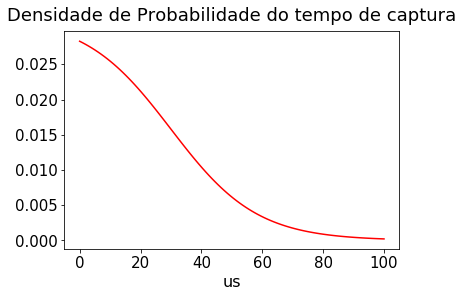

In [12]:
y_dataNB = []
ind = 0
for v in y_dataN[0]:
    #print(ind,v)
    y_dataNB.append(v/(v+y_dataB[0][ind]))
    ind+=1
    
normal5 = 0
for vxy in y_dataNB:
    # print(normal5)
    normal5 += vxy

for iy in range(len(y_dataNB)):
   # print(iy,y_dataNB[iy])
    y_dataNB[iy]=y_dataNB[iy]/normal5
    
print(np.sum(y_dataNB))

plt.xlabel('us', size=16)
plt.title('Densidade de Probabilidade do tempo de captura', y=1.02)

plt.plot(x_data, y_dataNB, color='r')



# Rodar até aqui para funções genéricas de todo código


## Criando um arquivo pós-processed com pares de eventos

In [ ]:

#periodo run OFF: 22-06-2020 - 17-08-2020  (reator OFF)
#periodo run ON : 18-08-2020 - 14-09-2020  (reator ON)

#yyyy=2020; mm=9; dd=2 #Total de registros: 16210102
#yyyy=2020; mm=7; dd=2 #Total de registros: 16289236

#yyyy=2020; mm=8; dd=24 #pair individual
#yyyy=2020; mm=6; dd=29 #pair individual

#yyyy=2020; mm=6; dd=20 #pair individual
#yyyy=2020; mm=8; dd=23 #pair individual
#yyyy=2020; mm=8; dd=1 #pair individual
#yyyy=2020; mm=7; dd=20 #pair individual

#yyyy=2020; mm=8; dd=10 #pair individual
#yyyy=2020; mm=7; dd=10 #pair individual
#yyyy=2020; mm=6; dd=25 #pair individual
#yyyy=2020; mm=8; dd=20 #pair individual
#yyyy=2020; mm=7; dd=15 #pair individual
#yyyy=2020; mm=8; dd=15 #pair individual
#yyyy=2020; mm=7; dd=25 #pair individual
#yyyy=2020; mm=8; dd=5 #pair individual
#yyyy=2020; mm=6; dd=21 #pair individual
#yyyy=2020; mm=6; dd=22 #pair individual
#yyyy=2020; mm=6; dd=23 #pair individual
#yyyy=2020; mm=6; dd=24 #pair individual
#yyyy=2020; mm=6; dd=26 #pair individual
#yyyy=2020; mm=6; dd=27 #pair individual
#yyyy=2020; mm=6; dd=28 #pair individual
#yyyy=2020; mm=7; dd=4 #pair individual
#yyyy=2020; mm=7; dd=5 #pair individual
#yyyy=2020; mm=8; dd=21 #pair individual
#yyyy=2020; mm=8; dd=22 #pair individual
#yyyy=2020; mm=8; dd=16 #pair individual
#yyyy=2020; mm=8; dd=17 #pair individual
#yyyy=2020; mm=8; dd=18 #pair individual
#yyyy=2020; mm=8; dd=19 #pair individual
#yyyy=2020; mm=7; dd=28 #pair individual
#yyyy=2020; mm=7; dd=13 #pair individual
#yyyy=2020; mm=7; dd=18 #pair individual
#yyyy=2020; mm=7; dd=23 #pair individual
#yyyy=2020; mm=7; dd=31 #pair individual
#yyyy=2020; mm=8; dd=3 #pair individual
#yyyy=2021; mm=4; dd=14 #pair individual
#yyyy=2020; mm=7; dd=6 #pair individual
#yyyy=2020; mm=7; dd=7 #pair individual
#yyyy=2020; mm=7; dd=8 #pair individual
#yyyy=2020; mm=7; dd=9 #pair individual
#yyyy=2020; mm=7; dd=11 #pair individual
#yyyy=2020; mm=7; dd=12 #pair individual
#yyyy=2020; mm=7; dd=14 #pair individual
#yyyy=2020; mm=7; dd=16 #pair individual
#yyyy=2020; mm=7; dd=17 #pair individual
#yyyy=2020; mm=7; dd=19 #pair individual
#yyyy=2020; mm=7; dd=21 #pair individual
#yyyy=2020; mm=7; dd=22 #pair individual
#yyyy=2020; mm=7; dd=24 #pair individual
#yyyy=2020; mm=9; dd=1 #pair individual
#yyyy=2020; mm=8; dd=31 #pair individual
#yyyy=2020; mm=8; dd=30 #pair individual
#yyyy=2020; mm=8; dd=29 #pair individual
#yyyy=2020; mm=9; dd=3 #pair individual
#yyyy=2020; mm=9; dd=4 #pair individual
#yyyy=2020; mm=9; dd=5 #pair individual
#yyyy=2020; mm=9; dd=6 #pair individual
#yyyy=2020; mm=9; dd=7 #pair individual
#yyyy=2020; mm=9; dd=8 #pair individual
#yyyy=2020; mm=9; dd=9 #pair individual
#yyyy=2020; mm=9; dd=10 #pair individual
#yyyy=2020; mm=9; dd=11 #pair individual
#yyyy=2020; mm=9; dd=12 #pair individual
#yyyy=2020; mm=9; dd=13 #pair individual
#yyyy=2020; mm=9; dd=14 #pair individual -- dados incompletos
#yyyy=2020; mm=9; dd=15 #pair individual -- dados vazios
#yyyy=2020; mm=9; dd=16 #pair individual -- dados vazios
#yyyy=2020; mm=9; dd=17 #pair individual -- dados vazios
#yyyy=2020; mm=9; dd=18 #pair individual -- dados vazios
#yyyy=2020; mm=9; dd=19 #pair individual -- dados vazios
#yyyy=2020; mm=9; dd=20 #pair individual -- dados vazios
#yyyy=2020; mm=9; dd=21 #pair individual -- dados vazios
#yyyy=2020; mm=9; dd=22 #pair individual -- dados vazios
#yyyy=2020; mm=9; dd=23 #pair individual  -- dados incompletos

#yyyy=2020; mm=9; dd=28 #pair individual
#yyyy=2020; mm=9; dd=24 #pair individual
#yyyy=2020; mm=9; dd=25 #pair individual
#yyyy=2020; mm=9; dd=26 #pair individual
#yyyy=2020; mm=9; dd=27 #pair individual
#yyyy=2020; mm=6; dd=14 #pair individual
#yyyy=2020; mm=6; dd=13 #pair individual
#yyyy=2020; mm=6; dd=12 #pair individual
#yyyy=2020; mm=6; dd=11 #pair individual
#yyyy=2020; mm=6; dd=10 #pair individual
yyyy=2020; mm=6; dd=9 #pair individual  -- dados incompletos
yyyy=2020; mm=6; dd=8 #pair individual  -- dados vazios
yyyy=2020; mm=6; dd=7 #pair individual  -- dados vazios
yyyy=2020; mm=6; dd=1 #pair individual  -- dados vazios
yyyy=2020; mm=5; dd=25 #pair individual -- dados vazios
yyyy=2020; mm=5; dd=20 #pair individual -- dados vazios
yyyy=2020; mm=5; dd=10 #pair individual -- dados vazios
yyyy=2020; mm=5; dd=1 #pair individual  -- dados vazios
#yyyy=2020; mm=10; dd=1 #pair individual
#yyyy=2020; mm=10; dd=2 #pair individual
#yyyy=2020; mm=10; dd=3 #pair individual
#yyyy=2020; mm=10; dd=4 #pair individual
#yyyy=2020; mm=10; dd=5 #pair individual
#yyyy=2020; mm=10; dd=6 #pair individual
#yyyy=2020; mm=10; dd=7 #pair individual
#yyyy=2020; mm=10; dd=8 #pair individual
#yyyy=2020; mm=10; dd=9 #pair individual
#yyyy=2020; mm=10; dd=10 #pair individual
#yyyy=2020; mm=10; dd=11 #pair individual
#yyyy=2020; mm=10; dd=12 #pair individual
#yyyy=2020; mm=10; dd=13 #pair individual
#yyyy=2020; mm=10; dd=14 #pair individual
#yyyy=2020; mm=10; dd=15 #pair individual
#yyyy=2020; mm=10; dd=16 #pair individual
#yyyy=2020; mm=10; dd=17 #pair individual


In [ ]:
%run def_functions.ipynb

In [57]:
print(len(find_interval_date('2020-10-21','2020-10-30')))
#print(find_interval_date('2019-11-01','2020-06-08')) ## Não há dados antes de 08/06/2020


476


In [20]:
#yyyy=2020; mm=10; dd=18 #pair individual
#yyyy=2020; mm=10; dd=19 #pair individual
#yyyy=2020; mm=10; dd=20 #pair individual
#yyyy=2020; mm=10; dd=21 #pair individual
#yyyy=2020; mm=10; dd=22 #pair individual
#yyyy=2020; mm=10; dd=23 #pair individual
#yyyy=2020; mm=10; dd=24 #pair individual
#yyyy=2020; mm=10; dd=25 #pair individual
#yyyy=2020; mm=10; dd=26 #pair individual
#yyyy=2020; mm=10; dd=27 #pair individual
#yyyy=2020; mm=10; dd=28 #pair individual
#yyyy=2020; mm=10; dd=29 #pair individual
yyyy=2020; mm=10; dd=30 #pair individual


sDate = '{0:d}-{1:0>2d}-{2:0>2d}'.format(yyyy,mm,dd)
sDir='data/{0:d}{1:0>2d}{2:0>2d}'.format(yyyy,mm,dd)
os.mkdir(sDir)

lista = find_interval_date(sDate,sDate)
#print(list)

indf=1

pair=[[] for x in range(80)]
event_pair = 0
subtotal_regs = 0
total_regs = 0
pairset = 1

print(datetime.datetime.now())


for file in lista:
    df = pd.read_parquet(file)
    i_epoc = int(extract_epoch(file))/1000
    print(indf,file,datetime.datetime.fromtimestamp(i_epoc).day,
          datetime.datetime.fromtimestamp(i_epoc).month,datetime.datetime.fromtimestamp(i_epoc).year)
    #print(file[28:60]+'_pair.parq')
    #break
    
    vd = str(datetime.datetime.fromtimestamp(i_epoc).day)+'-'+str(datetime.datetime.fromtimestamp(i_epoc).month)
    
    ev2 = [0 for x in range(80)] #[0,0,0,0,0]
    
    dfl = df.values.tolist()
    subtotal_regs += len(dfl)
    total_regs += len(dfl)
    
    for index1 in range(len(dfl)):
        if (index1!=0):
            
            regfix = dfl[index1].copy()
            ev1 = ev2.copy()
            
            #ev2[0] = regfix['Total_p_charge']/77.96 #em  pe
            ev2[0] = regfix[7]/77.96 #em  pe
            #ev2[1] = regfix['Timestamp1']*16/1E3 #em us
            ev2[1] = regfix[1]*16/1E3 #em us

            ev2[2] = fnc_find_y(p[0].get_xy(),ev1[0]) #probabilidade de ocorrência nesta energia (pelo PDF prompt)
            ev2[3] = fnc_find_y(d[0].get_xy(),ev2[0]) #probabilidade de ocorrência nesta energia (pelo PDF delay)
            ev2[4] = 0
            #totalTime_ON += ev2[1]
            if (int(ev2[1])<100):
                ev2[4] = y_dataNB[int(ev2[1])] #probabilidade temporal (pelo densidade de tempo)
            
            #ev2[5] = regfix['PMT01']; ev2[6] = regfix['PMT02']; ev2[7] = regfix['PMT03']; ev2[8] = regfix['PMT04']
            #ev2[9] = regfix['PMT05']; ev2[10] = regfix['PMT06']; ev2[11] = regfix['PMT07']; ev2[12] = regfix['PMT08']
            #ev2[13] = regfix['PMT09']; ev2[14] = regfix['PMT10']; ev2[15] = regfix['PMT11']; ev2[16] = regfix['PMT12']
            #ev2[17] = regfix['PMT13']; ev2[18] = regfix['PMT14']; ev2[19] = regfix['PMT15']; ev2[20] = regfix['PMT16']
            #ev2[21] = regfix['PMT17']; ev2[22] = regfix['PMT18']; ev2[23] = regfix['PMT19']; ev2[24] = regfix['PMT20']
            #ev2[25] = regfix['PMT21']; ev2[26] = regfix['PMT22']; ev2[27] = regfix['PMT23']; ev2[28] = regfix['PMT24']
            #ev2[29] = regfix['PMT25']; ev2[30] = regfix['PMT26']; ev2[31] = regfix['PMT27']; ev2[32] = regfix['PMT28']
            #ev2[33] = regfix['PMT29']; ev2[34] = regfix['PMT30']; ev2[35] = regfix['PMT31']; ev2[36] = regfix['PMT32']
            ev2[5] = regfix[8]; ev2[6] = regfix[9]; ev2[7] = regfix[10]; ev2[8] = regfix[11]
            ev2[9] = regfix[12]; ev2[10] = regfix[13]; ev2[11] = regfix[14]; ev2[12] = regfix[15]
            ev2[13] = regfix[16]; ev2[14] = regfix[17]; ev2[15] = regfix[18]; ev2[16] = regfix[19]
            ev2[17] = regfix[20]; ev2[18] = regfix[21]; ev2[19] = regfix[22]; ev2[20] = regfix[23]
            ev2[21] = regfix[24]; ev2[22] = regfix[25]; ev2[23] = regfix[26]; ev2[24] = regfix[27]
            ev2[25] = regfix[28]; ev2[26] = regfix[29]; ev2[27] = regfix[30]; ev2[28] = regfix[31]
            ev2[29] = regfix[32]; ev2[30] = regfix[33]; ev2[31] = regfix[34]; ev2[32] = regfix[35]
            ev2[33] = regfix[36]; ev2[34] = regfix[37]; ev2[35] = regfix[38]; ev2[36] = regfix[39]

            #ev2[37] = regfix['Saturated']; ev2[38] = regfix['Event_Number']
            ev2[37] = regfix[40]; ev2[38] = regfix[0]
            
            #print('2',datetime.datetime.now())
            qtde_PMTs = 0
            for ill in range(32):
                #campoPMT = 'PMT{0:0>2d}'.format(ill+1)
                #if (regfix[campoPMT]>77):
                if (ev2[5+ill]>77):
                    qtde_PMTs += 1
            ev2[39] = qtde_PMTs
            
            if (ev1[0]==0):
                continue
                    
            #print('3',datetime.datetime.now())
            i=int(ev1[0]) #prompt int energy
            j=int(ev2[0]) #delay int energy
            t=int(ev2[1]) #time interval - 13/09/2021
   
            ### chi sqr
            chi_sq_calc = ((i - prompt_mean)**2)/prompt_mean + ((j - delay_mean)**2)/delay_mean + ((t - time_mean)**2)/time_mean
                       
            event_pair+=1

            pair[0].append(event_pair)

            pair[1].append(ev1[5]); pair[2].append(ev1[6]);  pair[3].append(ev1[7]);  pair[4].append(ev1[8])
            pair[5].append(ev1[9]); pair[6].append(ev1[10]); pair[7].append(ev1[11]); pair[8].append(ev1[12])
            pair[9].append(ev1[13]);pair[10].append(ev1[14]);pair[11].append(ev1[15]);pair[12].append(ev1[16])
            pair[13].append(ev1[17]);pair[14].append(ev1[18]);pair[15].append(ev1[19]);pair[16].append(ev1[20])
            pair[17].append(ev1[21]);pair[18].append(ev1[22]);pair[19].append(ev1[23]);pair[20].append(ev1[24])
            pair[21].append(ev1[25]);pair[22].append(ev1[26]);pair[23].append(ev1[27]);pair[24].append(ev1[28])
            pair[25].append(ev1[29]);pair[26].append(ev1[30]);pair[27].append(ev1[31]);pair[28].append(ev1[32])
            pair[29].append(ev1[33]);pair[30].append(ev1[34]);pair[31].append(ev1[35]);pair[32].append(ev1[36])
            
            pair[33].append(ev1[0] * 77.96)  # em DUQ
            pair[34].append(ev1[0])  #em pe
            pair[35].append(ev1[2])  #PDF do prompt
            pair[36].append(ev1[39])  #multiplicidade > 77DUQ
            pair[37].append(ev1[37])  #satured
            
            pair[38].append(ev2[5]); pair[39].append(ev2[6]);  pair[40].append(ev2[7]);  pair[41].append(ev2[8])
            pair[42].append(ev2[9]); pair[43].append(ev2[10]); pair[44].append(ev2[11]); pair[45].append(ev2[12])
            pair[46].append(ev2[13]);pair[47].append(ev2[14]);pair[48].append(ev2[15]);pair[49].append(ev2[16])
            pair[50].append(ev2[17]);pair[51].append(ev2[18]);pair[52].append(ev2[19]);pair[53].append(ev2[20])
            pair[54].append(ev2[21]);pair[55].append(ev2[22]);pair[56].append(ev2[23]);pair[57].append(ev2[24])
            pair[58].append(ev2[25]);pair[59].append(ev2[26]);pair[60].append(ev2[27]);pair[61].append(ev2[28])
            pair[62].append(ev2[29]);pair[63].append(ev2[30]);pair[64].append(ev2[31]);pair[65].append(ev2[32])
            pair[66].append(ev2[33]);pair[67].append(ev2[34]);pair[68].append(ev2[35]);pair[69].append(ev2[36])
            
            pair[70].append(ev2[0] * 77.96)  # em DUQ
            pair[71].append(ev2[0])  #em pe
            pair[72].append(ev2[3])  #PDF do delay
            pair[73].append(ev2[39])  #multiplicidade > 77DUQ
            pair[74].append(ev2[37])  #satured
            
            pair[75].append(ev2[1])  #tempo
            pair[76].append(chi_sq_calc)  #chi^2
            pair[77].append(ev2[4])  #PDF do tempo

            pair[78].append(file)  #arquivo AngraRun
            #pair[78].append('')  #arquivo AngraRun
            pair[79].append(ev1[38])  #EventRun
            
            #print('4',datetime.datetime.now())
            #if (event_pair>10):
                #break

    if ((indf % 1)==0)or(indf>=len(lista)):  # mod 1 (antes era mod 6), pois quero gerar individuais agora - 06/10/2021
        # dictionary of lists
        dict = {'Pair': pair[0],
                'p_PMT01': pair[1],  'p_PMT02': pair[2],  'p_PMT03': pair[3],  'p_PMT04': pair[4], 
                'p_PMT05': pair[5],  'p_PMT06': pair[6],  'p_PMT07': pair[7],  'p_PMT08': pair[8], 
                'p_PMT09': pair[9],  'p_PMT10': pair[10], 'p_PMT11': pair[11], 'p_PMT12': pair[12], 
                'p_PMT13': pair[13], 'p_PMT14': pair[14], 'p_PMT15': pair[15], 'p_PMT16': pair[16], 
                'p_PMT17': pair[17], 'p_PMT18': pair[18], 'p_PMT19': pair[19], 'p_PMT20': pair[20], 
                'p_PMT21': pair[21], 'p_PMT22': pair[22], 'p_PMT23': pair[23], 'p_PMT24': pair[24], 
                'p_PMT25': pair[25], 'p_PMT26': pair[26], 'p_PMT27': pair[27], 'p_PMT28': pair[28], 
                'p_PMT29': pair[29], 'p_PMT30': pair[30], 'p_PMT31': pair[31], 'p_PMT32': pair[32], 
                'p_Total_charge': pair[33],'p_Total_pe': pair[34],'p_PDF': pair[35], 'p_mPMTs': pair[36], 'p_satured': pair[37],
                'd_PMT01': pair[38], 'd_PMT02': pair[39], 'd_PMT03': pair[40], 'd_PMT04': pair[41], 
                'd_PMT05': pair[42], 'd_PMT06': pair[43], 'd_PMT07': pair[44], 'd_PMT08': pair[45], 
                'd_PMT09': pair[46], 'd_PMT10': pair[47], 'd_PMT11': pair[48], 'd_PMT12': pair[49], 
                'd_PMT13': pair[50], 'd_PMT14': pair[51], 'd_PMT15': pair[52], 'd_PMT16': pair[53], 
                'd_PMT17': pair[54], 'd_PMT18': pair[55], 'd_PMT19': pair[56], 'd_PMT20': pair[57], 
                'd_PMT21': pair[58], 'd_PMT22': pair[59], 'd_PMT23': pair[60], 'd_PMT24': pair[61], 
                'd_PMT25': pair[62], 'd_PMT26': pair[63], 'd_PMT27': pair[64], 'd_PMT28': pair[65], 
                'd_PMT29': pair[66], 'd_PMT30': pair[67], 'd_PMT31': pair[68], 'd_PMT32': pair[69], 
                'd_Total_charge': pair[70],'d_Total_pe': pair[71],'d_PDF': pair[72], 'd_mPMTs': pair[73], 'd_satured': pair[74],
                'd_timeInverval': pair[75],'chi_square': pair[76],'t_PDF': pair[77],
                'file_Run': pair[78], 'Event_Number': pair[79]
               }
 
        # creating a dataframe from dictionary
        dfw = pd.DataFrame(dict)
        #dfw.to_parquet('data/AngraRun_Pair_{0:d}-{1:0>2d}-{2:0>2d}_{3:d}.parq'.format(yyyy,mm,dd,pairset))
        dfw.to_parquet(sDir+'/'+file[28:60]+'_pair.parq', compression='gzip')

        print('Subotal de registros: '+str(subtotal_regs))
        pair=[[] for x in range(80)]
        event_pair = 0
        subtotal_regs = 0
        pairset += 1
        del dict
        
    
    indf+=1
    
            
    
print('Total de registros: '+str(total_regs))

print(datetime.datetime.now())
print('Fim')

2023-08-30 07:11:26.405029
1 /data/processed/2020_phase2/AngraRun_1604065893456_processed_v4.parq 30 10 2020
Subotal de registros: 331709
2 /data/processed/2020_phase2/AngraRun_1604051396816_processed_v4.parq 30 10 2020
Subotal de registros: 332582
3 /data/processed/2020_phase2/AngraRun_1604042316957_processed_v4.parq 30 10 2020
Subotal de registros: 334719
4 /data/processed/2020_phase2/AngraRun_1604078612158_processed_v4.parq 30 10 2020
Subotal de registros: 331901
5 /data/processed/2020_phase2/AngraRun_1604058647315_processed_v4.parq 30 10 2020
Subotal de registros: 332115
6 /data/processed/2020_phase2/AngraRun_1604027799121_processed_v4.parq 30 10 2020
Subotal de registros: 336328
7 /data/processed/2020_phase2/AngraRun_1604082222068_processed_v4.parq 30 10 2020
Subotal de registros: 330487
8 /data/processed/2020_phase2/AngraRun_1604038684285_processed_v4.parq 30 10 2020
Subotal de registros: 335206
9 /data/processed/2020_phase2/AngraRun_1604091299121_processed_v4.parq 30 10 2020
Sub